<a href="https://colab.research.google.com/github/Rodo2005/transfer_learning_python/blob/main/1_simpsons_reducido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales convolucionales (CNN)

Ejemplo de clasificación utilizando redes neuronales convolucionales para la clasificación de imagenes<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical

from glob import glob
import matplotlib.image as mpimg

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

### `Simpsons dataset`:
El dataset **`Simpsons`** contiene 550Mbytes de imagenes a color de los personajes de los Simpsons (42 personajes). Cada imagen es de tiene al rededor de 500x450 píxeles a color (3 canales).<br> [Dataset source](https://www.kaggle.com/paultimothymooney/zipfiles)

In [2]:
# Descargar el dataset
import gdown
if os.access('simpsons_dataset_reducido', os.F_OK) is False:
    if os.access('simpsons_dataset_reducido.zip', os.F_OK) is False:
        url = 'https://drive.google.com/uc?id=1AXZzurDMFpC2eb5xu7dpiFk9RkHsNFem'
        output = 'simpsons_dataset_reducido.zip'
        gdown.download(url, output, quiet=False)
    !unzip -q simpsons_dataset_reducido.zip
else:
    print("El archivo ya se encuentra descargado")

Downloading...
From: https://drive.google.com/uc?id=1AXZzurDMFpC2eb5xu7dpiFk9RkHsNFem
To: /content/simpsons_dataset_reducido.zip
48.4MB [00:00, 162MB/s] 


In [3]:
# Visualizar los directiorios o tipos de personas
os.listdir("./simpsons_dataset_reducido")

['validation', 'train']

In [4]:
 # Visualizar los tipos de personajes
 train_dir = "./simpsons_dataset_reducido/train"
 validation_dir = "./simpsons_dataset_reducido/validation"
 os.listdir(train_dir)

['abraham_grampa_simpson',
 'troy_mcclure',
 'disco_stu',
 'agnes_skinner',
 'nelson_muntz',
 'comic_book_guy',
 'chief_wiggum',
 'sideshow_bob',
 'otto_mann',
 'lionel_hutz',
 'ralph_wiggum',
 'bart_simpson',
 'sideshow_mel',
 'barney_gumble',
 'mayor_quimby',
 'charles_montgomery_burns',
 'krusty_the_clown',
 'ned_flanders',
 'lisa_simpson',
 'moe_szyslak',
 'gil',
 'patty_bouvier',
 'edna_krabappel',
 'waylon_smithers',
 'milhouse_van_houten',
 'marge_simpson',
 'homer_simpson',
 'lenny_leonard',
 'groundskeeper_willie',
 'principal_skinner',
 'maggie_simpson',
 'cletus_spuckler',
 'fat_tony',
 'apu_nahasapeemapetilon',
 'miss_hoover',
 'selma_bouvier',
 'snake_jailbird',
 'carl_carlson',
 'kent_brockman',
 'rainier_wolfcastle',
 'professor_john_frink',
 'martin_prince']

In [5]:
personajes = os.listdir(train_dir)
print("Cantidad de tipos de personaejs:", len(personajes))

Cantidad de tipos de personaejs: 42


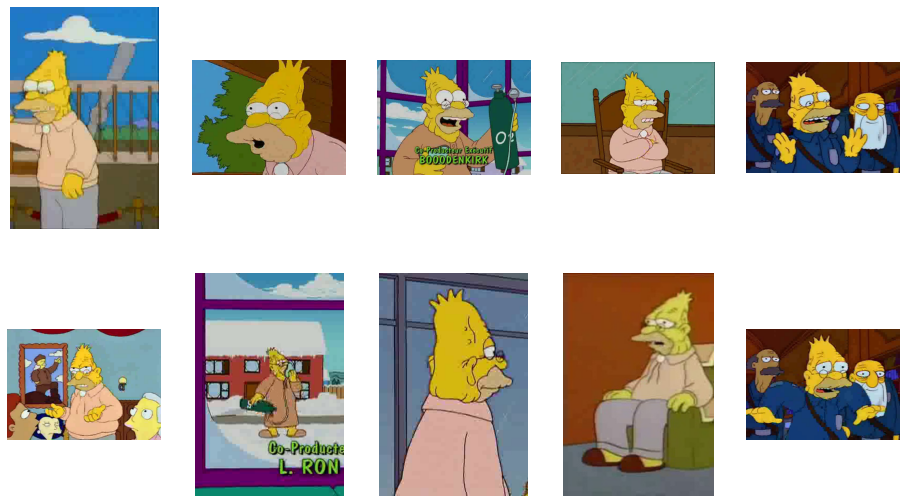

In [6]:
# Visualizar las 10 primeras imagenes de un personaje
files = glob(train_dir + "/" + personajes[0] + "/**.jpg")

fig = plt.figure(figsize=(16,9))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.axis('off')
    img = mpimg.imread(files[i])
    plt.imshow(img)
plt.show()

In [7]:
# Visualizar la dimension de la primera imagen
img = mpimg.imread(files[0])
img.shape

(480, 320, 3)

In [9]:
# Visualizar como están representados los pixeles
print(img[85, 100:110, :])

[[ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]
 [ 34 121 190]]


#### Conclusiones
- Las imagenes tienen tamaño variable, utilizaremos un tamaño reducido para que todas las imagenes sean iguales (se elije 150x150)
- Las imagenes están representadas de 0 a 255, hay que normalizarlas

Cantidad de abraham : 40


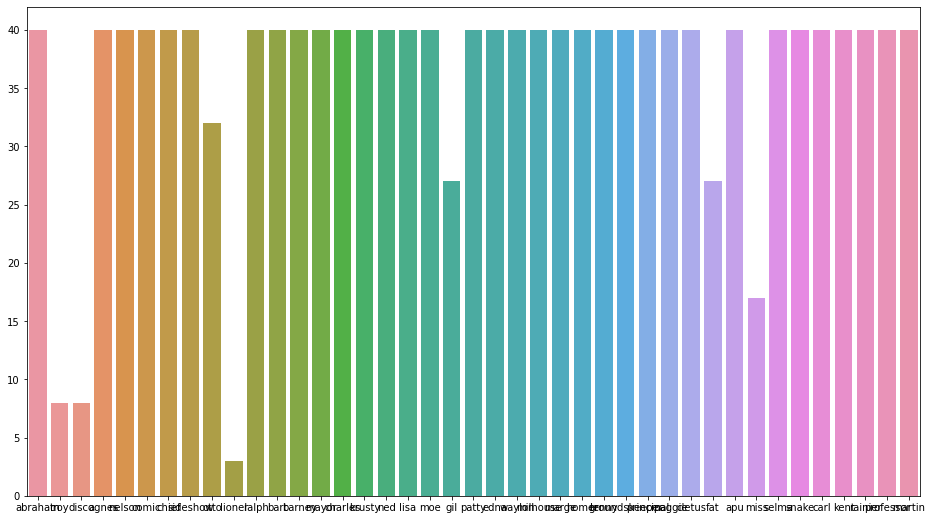

In [10]:
# Analizar cuantos personajes hay de cada uno
nombre_personajes = []
cantidad_personajes = []
for personaje in personajes:
    nombre_personaje = personaje.split("_")[0]
    files = glob(train_dir + "/" + personaje + "/**.jpg")
    nombre_personajes.append(nombre_personaje)
    cantidad_personajes.append(len(files))

print("Cantidad de", nombre_personajes[0], ":", cantidad_personajes[0])
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
sns.barplot(x=nombre_personajes, y=cantidad_personajes, ax=ax)
plt.show()

Se puede ver que el dataset está bastante balanceado

In [11]:
# Descargar datos de test
if os.access('simpsons_test', os.F_OK) is False:
    if os.access('simpsons_test.zip', os.F_OK) is False:
        if platform.system() == 'Windows':
            !curl https://github.com/InoveAlumnos/dataset_analytics_python/raw/master/simpsons_test.zip > simpsons_test.zip
        else:
            !wget simpsons_test.zip https://github.com/InoveAlumnos/dataset_analytics_python/raw/master/simpsons_test.zip
    !unzip -q simpsons_test.zip
else:
    print("El archivo ya se encuentra descargado")

--2021-02-27 01:01:28--  http://simpsons_test.zip/
Resolving simpsons_test.zip (simpsons_test.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘simpsons_test.zip’
--2021-02-27 01:01:28--  https://github.com/InoveAlumnos/dataset_analytics_python/raw/master/simpsons_test.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/simpsons_test.zip [following]
--2021-02-27 01:01:29--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/simpsons_test.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Crear un generador, indicando si deseamos realizar un escalado de la imagen
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode="categorical")

validation_generator = validation_datagen.flow_from_directory(
        directory=validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode="categorical")

index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))


Found 1522 images belonging to 42 classes.
Found 323 images belonging to 42 classes.


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [13]:
# El generador "train_generator" se lo puede utilizar para acceder a los datos
# de a cantidad batch de imagenes. En este caso el generador me retornará
# la primera vez las primeras 20 imagenes
# El generador devuelve las imagenes (X) y las clases(personaes) a las que
# pertenece (y)
# X, y = train_generator.next()
batch_imagenes, batch_clases = train_generator.next()

In [14]:
batch_imagenes.shape

(20, 150, 150, 3)

In [15]:
batch_clases.shape

(20, 42)

In [16]:
print("Cantidad de imagenes en el batch:", batch_imagenes.shape[0])
print("Dimensión de la imagen:", batch_imagenes.shape[1:])

Cantidad de imagenes en el batch: 20
Dimensión de la imagen: (150, 150, 3)


In [17]:
print("Cantidad de clases/personajes:", batch_clases.shape[1])

Cantidad de clases/personajes: 42


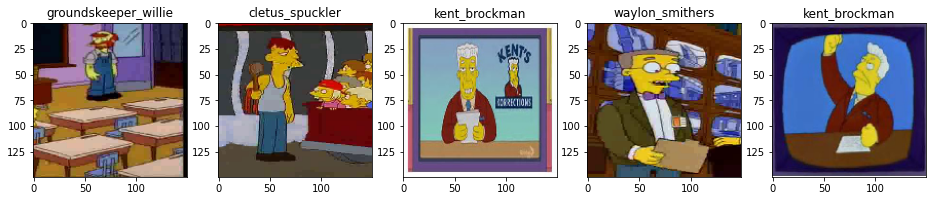

In [18]:
# Observar las primeras 5 imagenes de ese batch
fig = plt.figure(figsize=(16,9))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(batch_imagenes[i])
    numero_clase = batch_clases[i].argmax()
    ax.set_title(index_to_classes[numero_clase])
plt.show()

__Importante__! Luego de usar un generador "jugando", ese batch de imagenes que sacamos ya no se encontrará disponible para ser utilizado en el entrenamiento, es recomendable volver a crear los generadores si se los consumen

In [19]:
# Crear un generador, indicando si deseamos realizar un escalado de la imagen
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode="categorical")

index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))

Found 1522 images belonging to 42 classes.


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

In [ ]:
# Los generadores ya que encargan de transformar la salida a oneHotEncoding

In [20]:
# input shape (observado del análisis de datos)
in_shape = (150, 150, 3)
in_shape

(150, 150, 3)

In [21]:
# output shape (observado del análisis de datos)
out_shape = 42
out_shape

42

In [22]:
# Debemos definir cuantas imagenes se consumiran por epoca (steps_per_epoch)
# ya que estando el generador en el medio Keras no puede saberlo por
# su cuenta
steps_per_epoch_train = len(train_generator)
steps_per_epoch_train

77

In [23]:
steps_per_epoch_validation = len(validation_generator)
steps_per_epoch_validation

17

In [24]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()

# Ahora agregaremos más pares de capas CONV + POOL a fin de reducir más la
# dimensión de la imagen antes de llegar a la capa flatten
# Otra estrategia es ir aumentando la cantidad de filtros a medida que crece
# la profundidad de la red

# convolucional f=(3,3), # de filtros: 8, activación relu
# max pooling f=2, s=2
model.add(Conv2D(filters = 8, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
# convolucional f=(3,3), # de filtros: 16, activación relu
# max pooling f=2, s=2
model.add(Conv2D(filters = 16, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
# convolucional f=(3,3), # de filtros: 64, activación relu
# max pooling f=2, s=2
model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
# capa flatten
model.add(Flatten())
# capa densa de 64 elementos activación relu
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.2))
# capa densa con un output de 10 elemento con activación softmax
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        1

In [25]:
history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch_train,
      validation_data=validation_generator,
      validation_steps=steps_per_epoch_validation,
      epochs=10
      )

Epoch 1/10
77/77 [==============================] - 13s 73ms/step - loss: 3.7301 - accuracy: 0.0296 - val_loss: 3.6241 - val_accuracy: 0.0402
Epoch 2/10
77/77 [==============================] - 5s 67ms/step - loss: 3.5870 - accuracy: 0.0639 - val_loss: 3.4322 - val_accuracy: 0.0960
Epoch 3/10
77/77 [==============================] - 5s 67ms/step - loss: 3.1659 - accuracy: 0.1604 - val_loss: 3.3026 - val_accuracy: 0.1486
Epoch 4/10
77/77 [==============================] - 5s 66ms/step - loss: 2.7173 - accuracy: 0.2791 - val_loss: 3.2374 - val_accuracy: 0.1455
Epoch 5/10
77/77 [==============================] - 5s 66ms/step - loss: 2.1083 - accuracy: 0.4368 - val_loss: 3.3796 - val_accuracy: 0.1827
Epoch 6/10
77/77 [==============================] - 5s 67ms/step - loss: 1.6087 - accuracy: 0.5619 - val_loss: 3.3356 - val_accuracy: 0.1950
Epoch 7/10
77/77 [==============================] - 5s 66ms/step - loss: 1.0856 - accuracy: 0.7000 - val_loss: 3.6457 - val_accuracy: 0.2136
Epoch 8/10
7

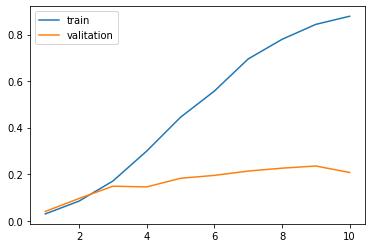

In [27]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valitation')
plt.show()

In [28]:
# Predecir los datos
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        directory="./simpsons_test",
        target_size=(150, 150),
        batch_size=10,
        class_mode=None,
        shuffle=False)

y_hat_prob = model.predict(test_generator)
y_hat_prob[0]

Found 10 images belonging to 1 classes.


array([6.94789469e-01, 4.50521100e-07, 6.55771055e-06, 4.78433140e-06,
       6.69447109e-02, 2.84562333e-07, 8.25608987e-03, 4.92556808e-07,
       2.62234011e-04, 2.80393753e-02, 8.13503575e-05, 1.06412466e-04,
       5.45211285e-02, 1.22583299e-06, 1.90609717e-05, 4.72001685e-03,
       3.42383782e-06, 9.65385993e-07, 5.24704205e-03, 2.44696459e-08,
       2.07496621e-03, 3.29085174e-06, 1.03879023e-10, 7.92933463e-07,
       6.90451634e-05, 3.56129603e-05, 1.86241755e-06, 6.18644850e-03,
       9.95876044e-02, 2.33931583e-03, 4.85498385e-05, 3.36633065e-07,
       2.44500791e-03, 5.51644298e-05, 7.18217677e-07, 1.54474461e-02,
       5.85442166e-08, 3.04001478e-05, 2.00378203e-08, 1.51754648e-04,
       5.73002580e-07, 8.51599406e-03], dtype=float32)

In [29]:
y_hat = np.argmax(y_hat_prob,axis=1)
y_hat

array([ 0,  6,  2,  4, 39, 35, 22,  9,  3, 37])

In [30]:
#¿Cómo obtenemos el "y" verdadero?
test_generator.filenames

['test_images/abraham_grampa_simpson_39.jpg',
 'test_images/charles_montgomery_burns_24.jpg',
 'test_images/homer_simpson_33.jpg',
 'test_images/krusty_the_clown_17.jpg',
 'test_images/lisa_simpson_5.jpg',
 'test_images/lisa_simpson_7.jpg',
 'test_images/marge_simpson_18.jpg',
 'test_images/milhouse_van_houten_46.jpg',
 'test_images/nelson_muntz_12.jpg',
 'test_images/sideshow_bob_38.jpg']

In [31]:
# Muy rebuscada esta forma de obtener los nombres de los personajes!
# Pero en general cuando tenemos los datos de test no tenemos los nombres
# por lo que no tenemos el "y" verdadero
personajes_test = []
for file in test_generator.filenames:
    image_name = os.path.basename(file)
    image_name_split = image_name.split("_")
    personaje_name_split = image_name_split[:len(image_name_split)-1]
    personaje = personaje_name_split[0]
    for name in personaje_name_split[1:]:
        personaje += "_" + name
    personajes_test.append(personaje)
personajes_test

['abraham_grampa_simpson',
 'charles_montgomery_burns',
 'homer_simpson',
 'krusty_the_clown',
 'lisa_simpson',
 'lisa_simpson',
 'marge_simpson',
 'milhouse_van_houten',
 'nelson_muntz',
 'sideshow_bob']

In [32]:
# Obtener el "y" verdadero
y_test = [train_generator.class_indices[personaje] for personaje in personajes_test]
y_test

[0, 6, 15, 17, 20, 20, 22, 25, 29, 37]

In [33]:
# Descargar el modelo entrenado para usar en el futuro sin tener
# que volver a entrenarlo
model.save("cnn_simpsons_reducido.h5")

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [34]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.4

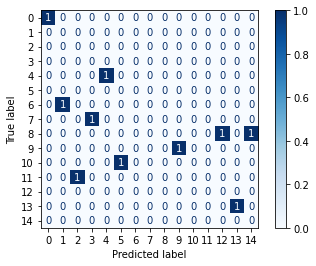

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=range(47))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 números clasificados con una ANN para evlauar contra este nuevo modelo de red neuronal

In [36]:
batch_test = test_generator.next()

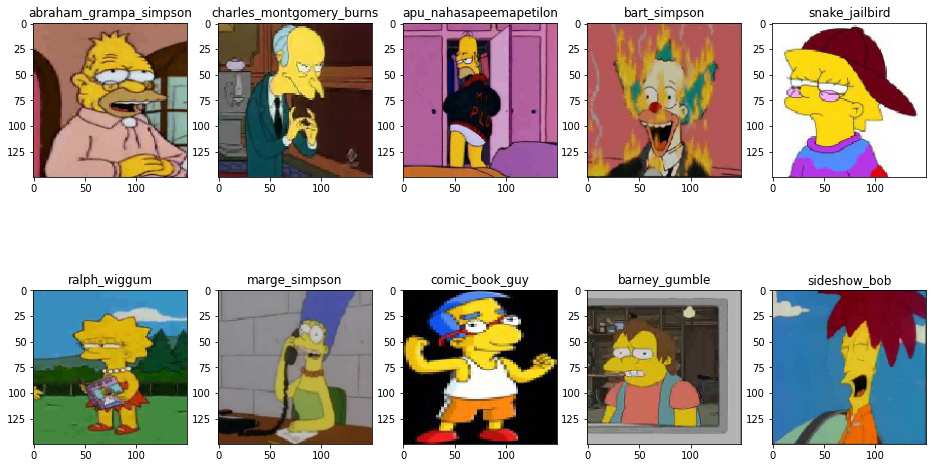

In [37]:
# Observar las primeras 5 imagenes de ese batch
fig = plt.figure(figsize=(16,9))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(batch_test[i])
    numero_clase = y_hat[i]
    ax.set_title(index_to_classes[numero_clase])
plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Se pudo ver en este ejemplo que el hecho de haber reducido el tamaño del dataset hizo que el entrenamiento se hiciera más rápido pero se produjo overfitting, el sistema durante el entrenamiento (train) creo que está logrando buenos resultados pero la validación no lo acompaña. Se puede ver que la cantidad de datos es FUNDAMENTAL en deep learning.